<a href="https://colab.research.google.com/github/TSobha/FDP_CV/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/FDP-CV/Hyperparam_tuning')

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


keras dataset
keras tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.9.2


10 classes of dresses. <br> B/W images of low resolution

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
np.min(train_images)


0

In [ ]:
np.max(train_images)


255

In [ ]:
np.min(test_images)


0

In [ ]:
np.max(test_images)

255

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
print("Train Minimum", np.min(train_images))
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 1.0
Test Minimum 0.0
Test Maximum 1.0


In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

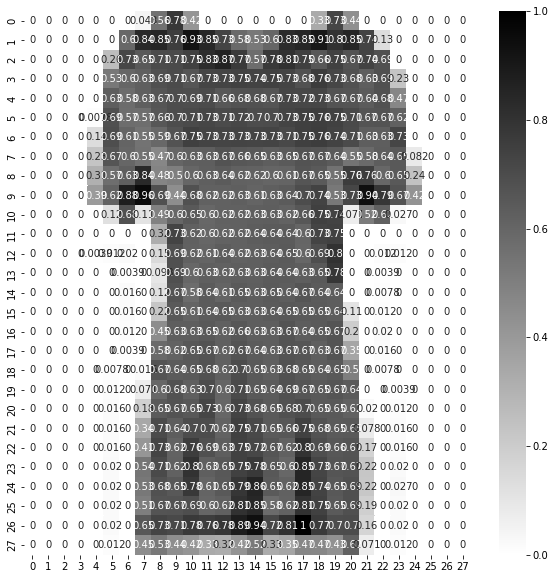

In [ ]:
plt.figure(figsize = (10,10)) # width and height
sns.heatmap(train_images[10], annot =True, cmap = 'binary')

Reshaping data to feed it to CNN <br> 
Number of images, pixel size, channel number

In [ ]:
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

Hyperparameters are parameters other than weight and bias. <br>
Tuning gives best performance to hyperparameters.<br>

Tuners

RandomSearch Tuner <br>
Hyperband Tuner <br>
Bayesian Optimization Tuner




hp is the hyperparameter <br>
conv1 filter tries out all values from 32 to 128.<br>
kernel size will be chosen as either 3 or 5. <br>
for binary classificaton we go for sigmoid activation function ,br>

Optimisers

Gradient descnet <br>
Adaptive gradient <br>
Stovchastic <br>

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

Import Random Search and hyperparameter

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

We give the name of function build_model <br>
Our objective is to improve validation accuracy <br>

In [ ]:
tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5 ,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

ValueError: ignored

In [ ]:
model.summary()

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)